In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_seti = pd.read_csv("hmelq.csv")

df = data_seti.copy()

In [3]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


In [143]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [6]:
df.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


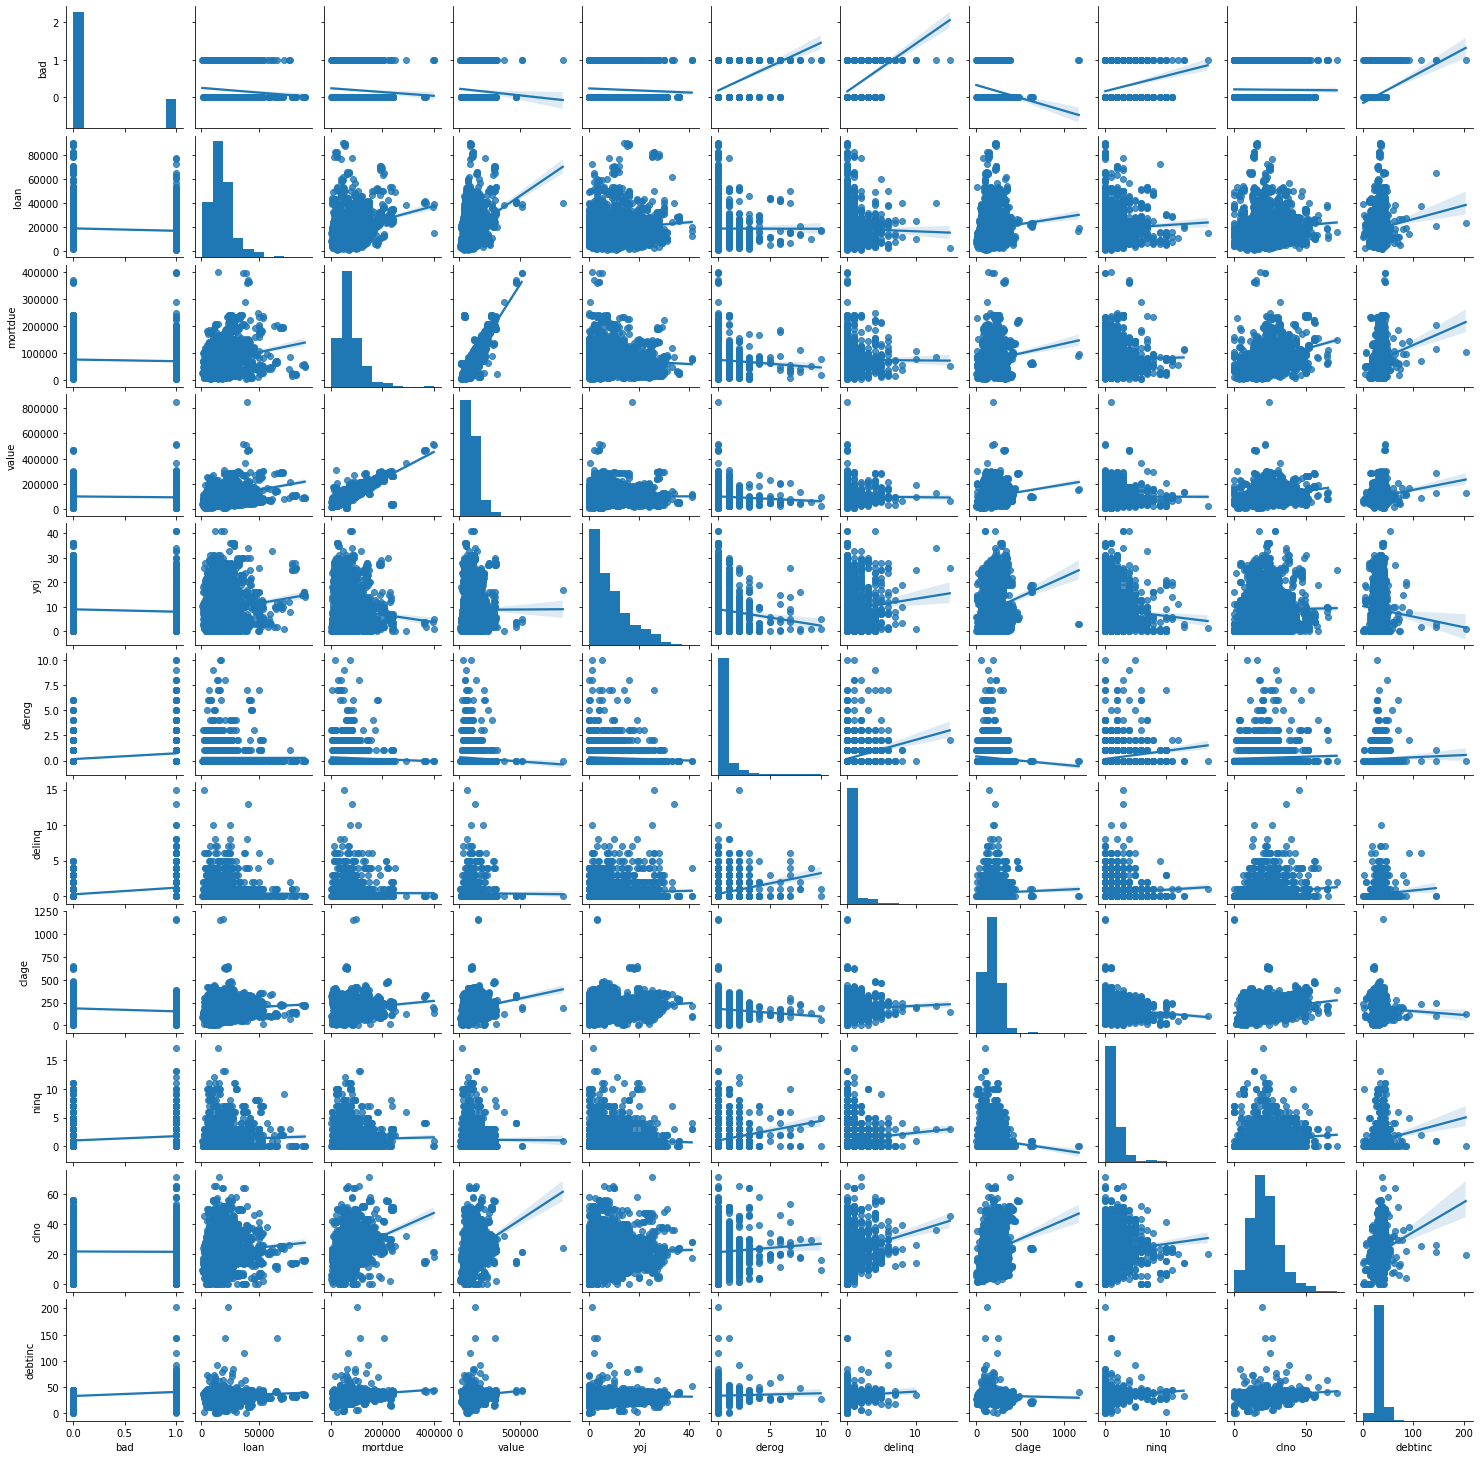

In [20]:
sns.pairplot(df, kind="reg").fig.set_size_inches(20,20)

Text(0.5, 1.0, 'Clno İçin Dağılım Grafiği')

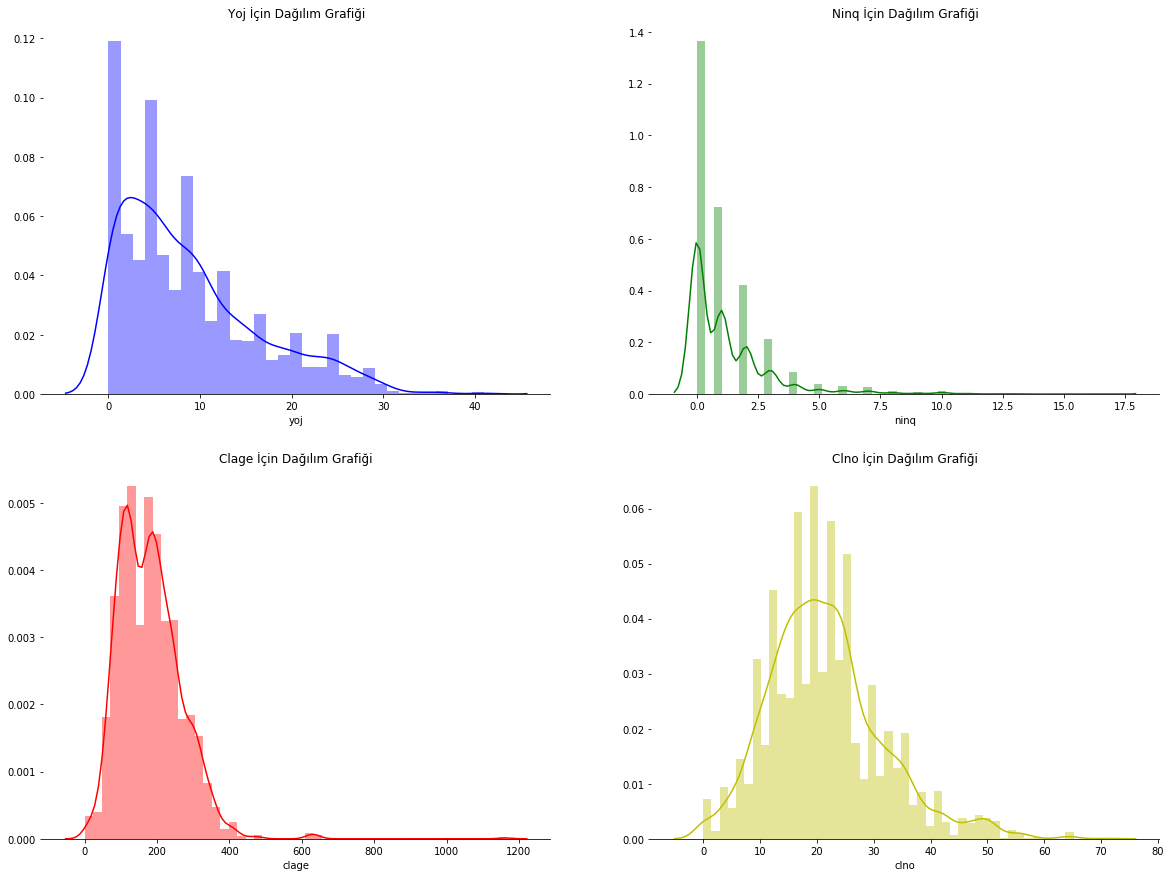

In [154]:
f, axes = plt.subplots(2,2, figsize=(20, 15))
sns.despine(left=True)

sns.distplot(df["yoj"],color="b",ax=axes[0,0]).set_title("Yoj İçin Dağılım Grafiği")

sns.distplot(df["clage"],color="r",ax=axes[1,0]).set_title("Clage İçin Dağılım Grafiği")

sns.distplot(df["ninq"],color="g",ax=axes[0,1]).set_title("Ninq İçin Dağılım Grafiği")

sns.distplot(df["clno"],color="y",ax=axes[1,1]).set_title("Clno İçin Dağılım Grafiği")

Text(0.5, 1.0, 'Debtinc İçin Dağılım Grafiği')

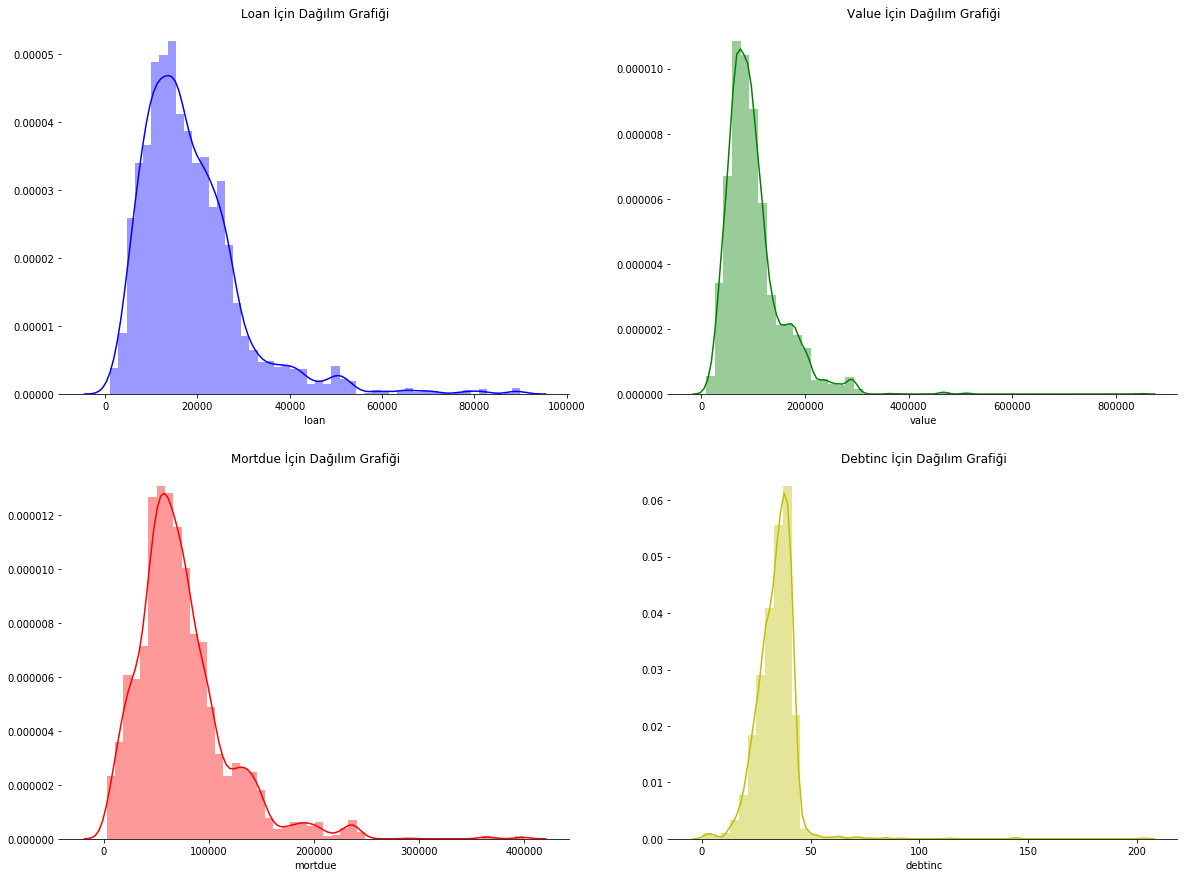

In [8]:
f, axes = plt.subplots(2,2, figsize=(20, 15))
sns.despine(left=True)

sns.distplot(df["loan"],color="b",ax=axes[0,0]).set_title("Loan İçin Dağılım Grafiği")

sns.distplot(df["mortdue"],color="r",ax=axes[1,0]).set_title("Mortdue İçin Dağılım Grafiği")

sns.distplot(df["value"],color="g",ax=axes[0,1]).set_title("Value İçin Dağılım Grafiği")

sns.distplot(df["debtinc"],color="y",ax=axes[1,1]).set_title("Debtinc İçin Dağılım Grafiği")

Text(0.5, 1.0, 'kredi limiti sayısı')

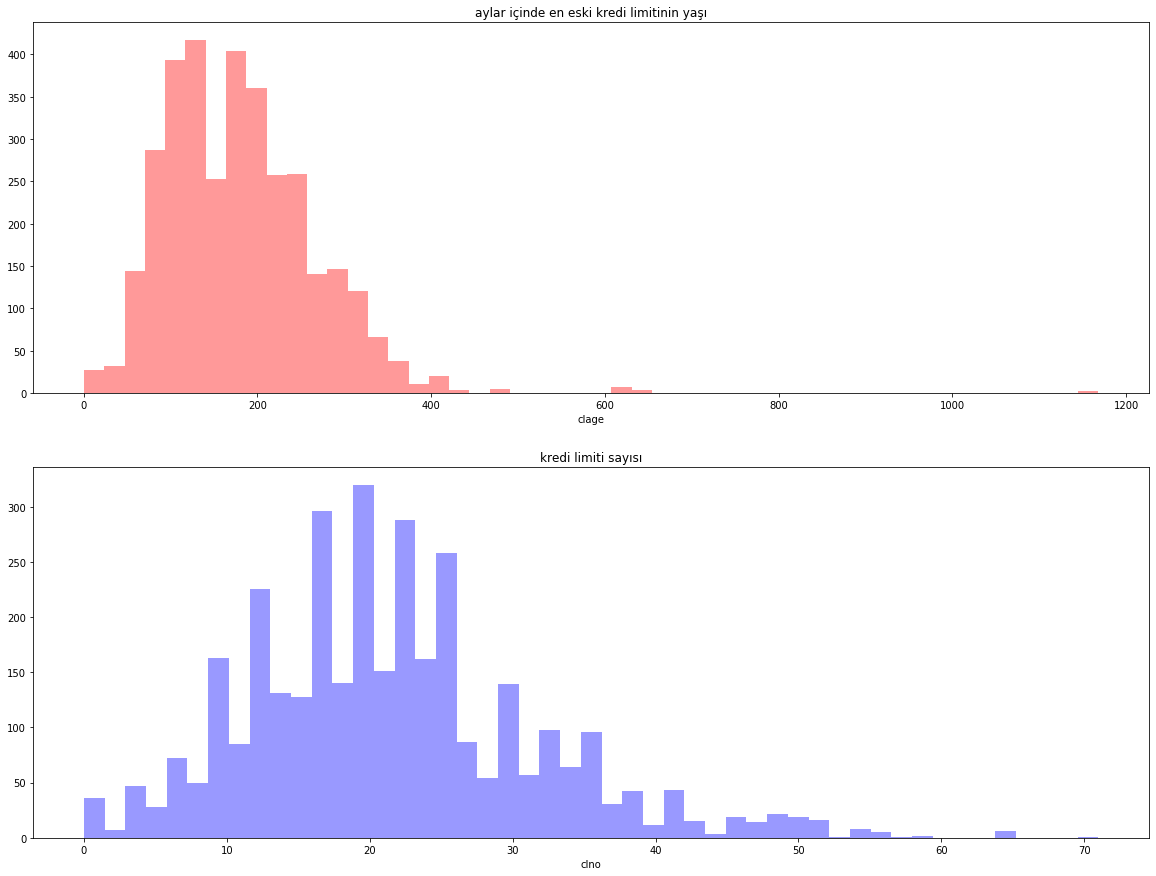

In [12]:
f, axes = plt.subplots(2,1, figsize=(20, 15))


sns.distplot(df['clage'],kde = False, color="r", ax=axes[0]).set_title("aylar içinde en eski kredi limitinin yaşı")


sns.distplot(df['clno'],kde = False,  color="b", ax=axes[1]).set_title("kredi limiti sayısı")

Text(0.5, 1.0, 'Ödenmemiş Kredi Asgari Ücret Sayısı')

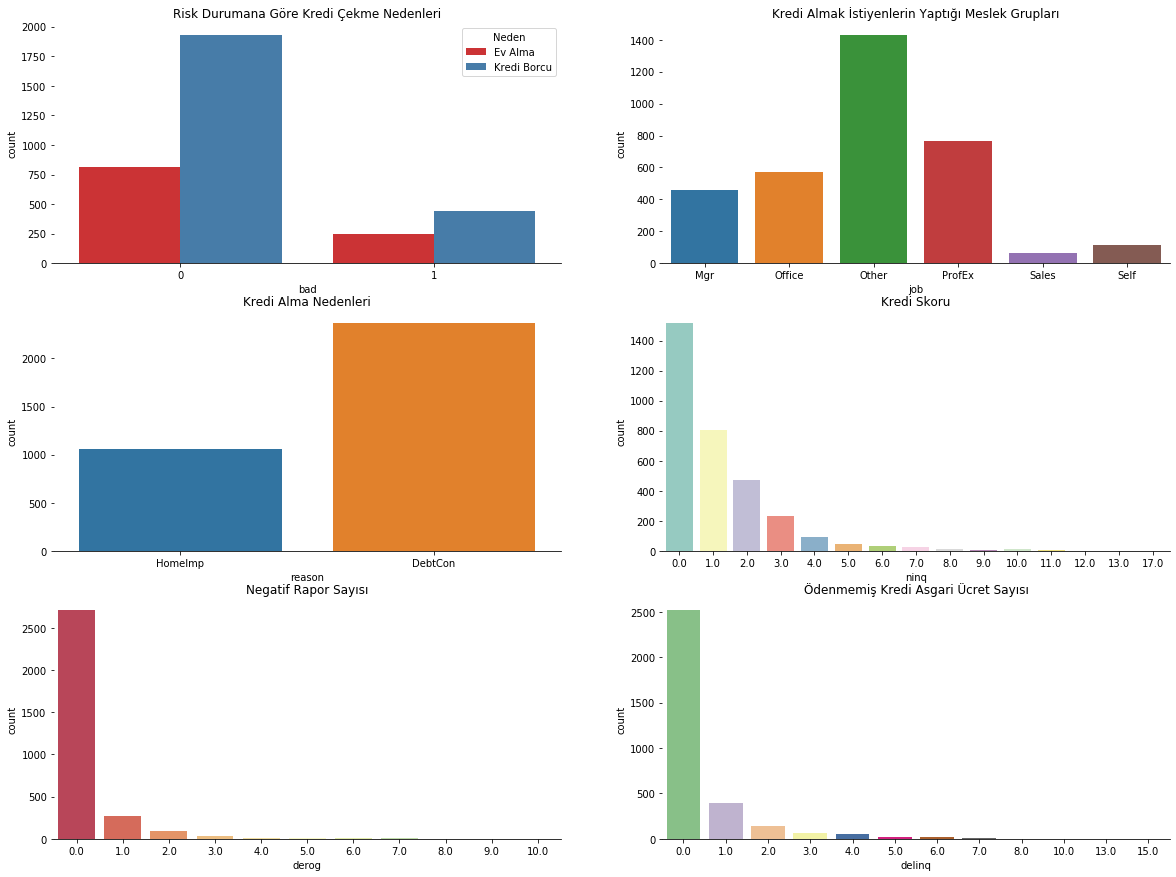

In [13]:
f, axes = plt.subplots(3,2, figsize=(20, 15))
sns.despine(left=True)

sns.countplot(x="bad", hue="reason",data=df, palette="Set1", ax=axes[0,0]).set_title("Risk Durumana Göre Kredi Çekme Nedenleri")
axes[0][0].legend(title='Neden', loc='upper right', labels=['Ev Alma', 'Kredi Borcu'])


sns.countplot(x="reason", data=df, ax=axes[1,0]).set_title("Kredi Alma Nedenleri")

sns.countplot(x="job", data=df, ax=axes[0,1]).set_title("Kredi Almak İstiyenlerin Yaptığı Meslek Grupları")

sns.countplot(x="ninq", data=df, palette="Set3", ax=axes[1,1]).set_title("Kredi Skoru")

sns.countplot(x="derog", data=df, palette="Spectral", ax=axes[2,0]).set_title("Negatif Rapor Sayısı")

sns.countplot(x="delinq", data=df, palette="Accent", ax=axes[2,1]).set_title("Ödenmemiş Kredi Asgari Ücret Sayısı")



In [14]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [15]:
df.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


Text(0.5, 1.0, 'Debtinc İçin Kutu Grafiği')

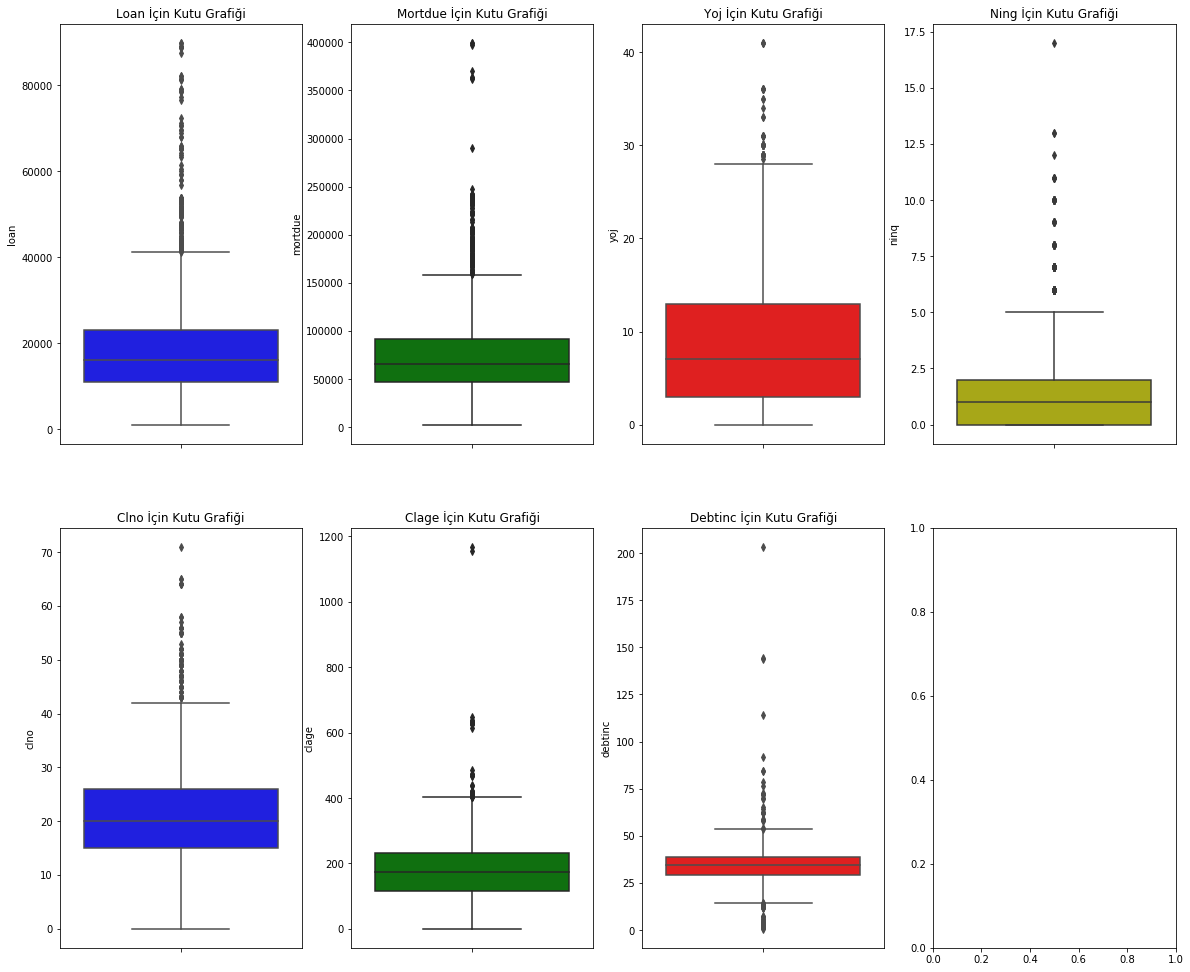

In [32]:
fig, axes = plt.subplots(2,4,figsize=(20,17))


sns.boxplot(y="loan", data=df, palette=["b"], ax=axes[0,0]).set_title("Loan İçin Kutu Grafiği")

sns.boxplot(y="mortdue", data=df, palette=["g"], ax=axes[0,1]).set_title("Mortdue İçin Kutu Grafiği")

sns.boxplot(y="yoj", data=df, palette=["r"], ax=axes[0,2]).set_title("Yoj İçin Kutu Grafiği")

sns.boxplot(y="ninq", data=df, palette=["y"], ax=axes[0,3]).set_title("Ning İçin Kutu Grafiği")

sns.boxplot(y="clno", data=df, palette=["b"], ax=axes[1,0]).set_title("Clno İçin Kutu Grafiği")

sns.boxplot(y="clage", data=df, palette=["g"], ax=axes[1,1]).set_title("Clage İçin Kutu Grafiği")

sns.boxplot(y="debtinc", data=df, palette=["r"], ax=axes[1,2]).set_title("Debtinc İçin Kutu Grafiği")



In [ ]:
from scipy.stats import shapiro

In [260]:
stat, p = shapiro(df["loan"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Dağılım normalden geliyor (H0 reddedilemez)')
else:
    print('Normal dağılımdan gelmiyor (H0 reddedilir)')

Statistics=0.849, p=0.000
Normal dağılımdan gelmiyor (H0 reddedilir)


In [261]:
stat, p = shapiro(df["mortdue"])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Dağılım normalden geliyor (H0 reddedilemez)')
else:
    print('Normal dağılımdan gelmiyor (H0 reddedilir)')

Statistics=0.874, p=0.000
Normal dağılımdan gelmiyor (H0 reddedilir)


In [186]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [187]:
mean_confidence_interval(df["loan"])

(18529.697986577183, 18160.427939461777, 18898.96803369259)

In [233]:
# H0 mu = 18500
# H1 mu != 18500

alpha = 0.05
stat, p = stats.ttest_1samp(df["loan"], popmean = 18500)
print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print("H0 hipotezi reddedilemez")
else:
    print("H0 hipotezi reddedilir")

Statistics=0.15768, p=0.87472
H0 hipotezi reddedilemez


In [ ]:
df['mortdue'].fillna((df['mortdue'].mean()), inplace=True)

In [232]:
# H0 mu = 70000
# H1 mu != 70000

alpha = 0.05
stat, p = stats.ttest_1samp(df["mortdue"], popmean = 70000)
print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print("H0 hipotezi reddedilemez")
else:
    print("H0 hipotezi reddedilir")

Statistics=5.70966, p=0.00000
H0 hipotezi reddedilir


In [226]:
mean_confidence_interval(df["mortdue"])

(74013.90799202943, 72635.58001266643, 75392.23597139244)

In [65]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [66]:
import statsmodels.api as sm
import pylab

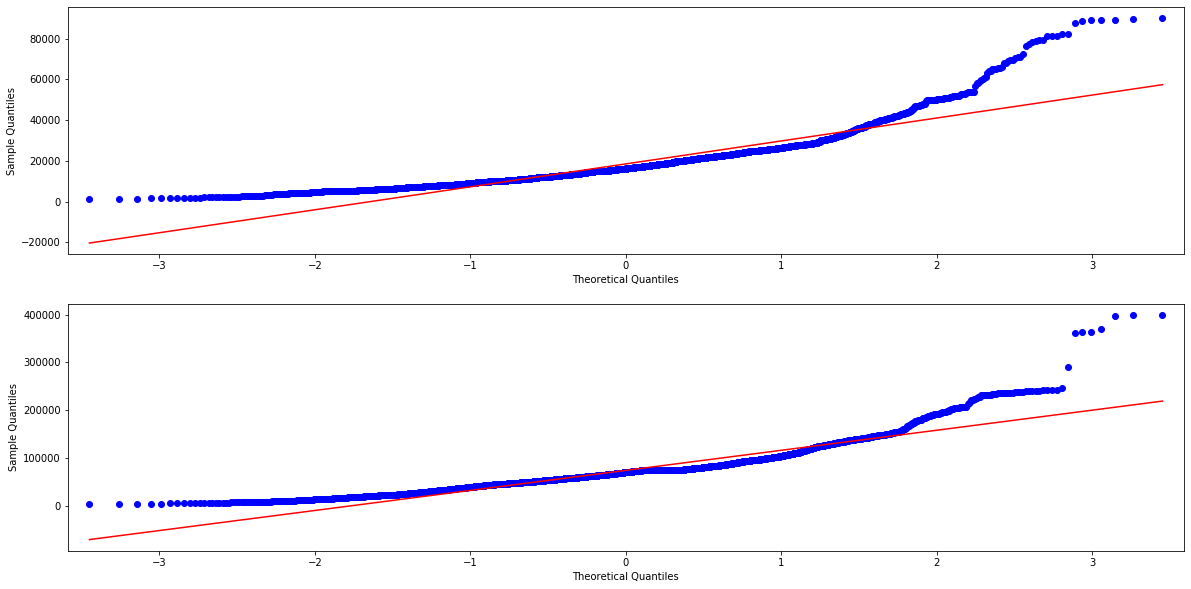

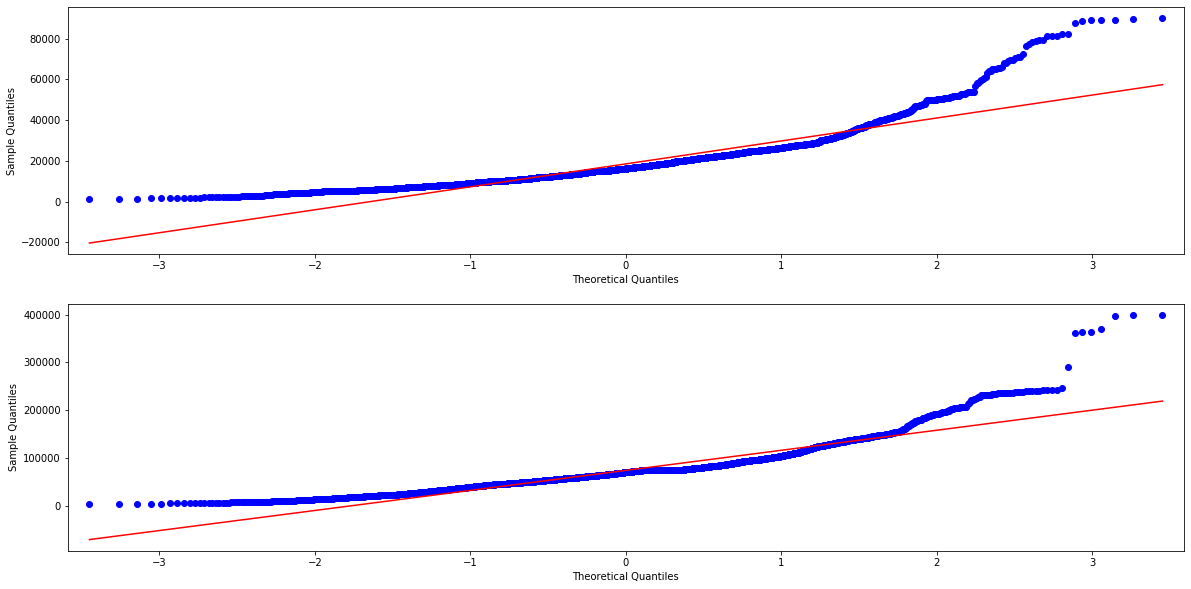

In [253]:
fig, axes = plt.subplots(2,figsize=(20,10))

#sns.boxplot(y="loan", data=df, palette=["b"], ax=axes[0,0]).set_title("Loan İçin Kutu Grafiği")


sm.qqplot(df["loan"], dist="norm", line='s', ax=axes[0])

sm.qqplot(df["mortdue"], dist="norm", line='s', ax=axes[1])

